In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.dpi":300})
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
student_data = pd.read_csv('./student_data.csv')
numeric_vars = ['PMH', 'SWLS', 'sssc', 'sfsc', 'PEI', 'NEI', 'shs', 'drink', 'friends', 'sleep']

def standardize(df):
    return (df - df.min()) / (df.max() - df.min())

moran_quantile = 0.33

high_DEPs = student_data[student_data['DEP'] >= 3]
low_DEPs = student_data[student_data['DEP'] <= 0]

lowM_threshold = high_DEPs['local_moran'].quantile(moran_quantile)
highM_threshold = high_DEPs['local_moran'].quantile(1 - moran_quantile)
highM_highD = high_DEPs[high_DEPs['local_moran'] >= highM_threshold]
middleM_highD = high_DEPs[(high_DEPs['local_moran'] > lowM_threshold) & (high_DEPs['local_moran'] < highM_threshold)]
lowM_highD = high_DEPs[high_DEPs['local_moran'] <= lowM_threshold]
print(highM_threshold, lowM_threshold)

lowM_threshold = low_DEPs['local_moran'].quantile(moran_quantile)
highM_threshold = low_DEPs['local_moran'].quantile(1 - moran_quantile)
highM_lowD = low_DEPs[low_DEPs['local_moran'] >= highM_threshold]
middleM_lowD = low_DEPs[(low_DEPs['local_moran'] > lowM_threshold) & (low_DEPs['local_moran'] < highM_threshold)]
lowM_lowD = low_DEPs[low_DEPs['local_moran'] <= lowM_threshold]
print(highM_threshold, lowM_threshold)

highM_highD.shape, middleM_highD.shape, lowM_highD.shape, highM_lowD.shape, middleM_lowD.shape, lowM_lowD.shape

C:\Users\12576\AppData\Local\Temp\ipykernel_10452\3023924226.py:1: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  student_data = pd.read_csv('./student_data.csv')


1.667440374905702 -0.0306908221383534
1.5522992625911576 0.7919255019999686


((20917, 69), (19438, 69), (21266, 69), (39559, 69), (37741, 69), (38108, 69))

In [3]:
low_var = pd.DataFrame(columns=numeric_vars)
high_var = pd.DataFrame(columns=numeric_vars)

for age in range(9, 19):
    age_df = student_data[student_data['age'] == age]

    age_highM_highD = highM_highD[highM_highD['age'] == age]
    age_middleM_highD = middleM_highD[middleM_highD['age'] == age]
    age_lowM_highD = lowM_highD[lowM_highD['age'] == age]
    age_highM_lowD = highM_lowD[highM_lowD['age'] == age]
    age_middleM_lowD = middleM_lowD[middleM_lowD['age'] == age]
    age_lowM_lowD = lowM_lowD[lowM_lowD['age'] == age]

    age_highM_highD = age_highM_highD[numeric_vars].mean() - age_df[numeric_vars].mean()
    age_middleM_highD = age_middleM_highD[numeric_vars].mean() - age_df[numeric_vars].mean()
    age_lowM_highD = age_lowM_highD[numeric_vars].mean() - age_df[numeric_vars].mean()
    age_highM_lowD = age_highM_lowD[numeric_vars].mean() - age_df[numeric_vars].mean()
    age_middleM_lowD = age_middleM_lowD[numeric_vars].mean() - age_df[numeric_vars].mean()
    age_lowM_lowD = age_lowM_lowD[numeric_vars].mean() - age_df[numeric_vars].mean()

    age_high_vars = pd.DataFrame(data=[age_highM_highD, age_middleM_highD, age_lowM_highD]) / (age_df[numeric_vars].max() - age_df[numeric_vars].min() + 0.0001)
    age_low_vars = pd.DataFrame(data=[age_highM_lowD, age_middleM_lowD, age_lowM_lowD]) / (age_df[numeric_vars].max() - age_df[numeric_vars].min() + 0.0001)
    age_high_vars = age_high_vars.iloc[0] - age_high_vars.iloc[2]
    age_low_vars = age_low_vars.iloc[0] - age_low_vars.iloc[2]

    high_var = high_var.append(age_high_vars, ignore_index=True)
    low_var = low_var.append(age_low_vars, ignore_index=True)

high_var.index = np.arange(9, 19)
low_var.index = high_var.index

C:\Users\12576\AppData\Local\Temp\ipykernel_10452\3400883119.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_var = high_var.append(age_high_vars, ignore_index=True)
C:\Users\12576\AppData\Local\Temp\ipykernel_10452\3400883119.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  low_var = low_var.append(age_low_vars, ignore_index=True)
C:\Users\12576\AppData\Local\Temp\ipykernel_10452\3400883119.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_var = high_var.append(age_high_vars, ignore_index=True)
C:\Users\12576\AppData\Local\Temp\ipykernel_10452\3400883119.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  low_var 

Text(0.5, 126.74999999999999, 'Age')

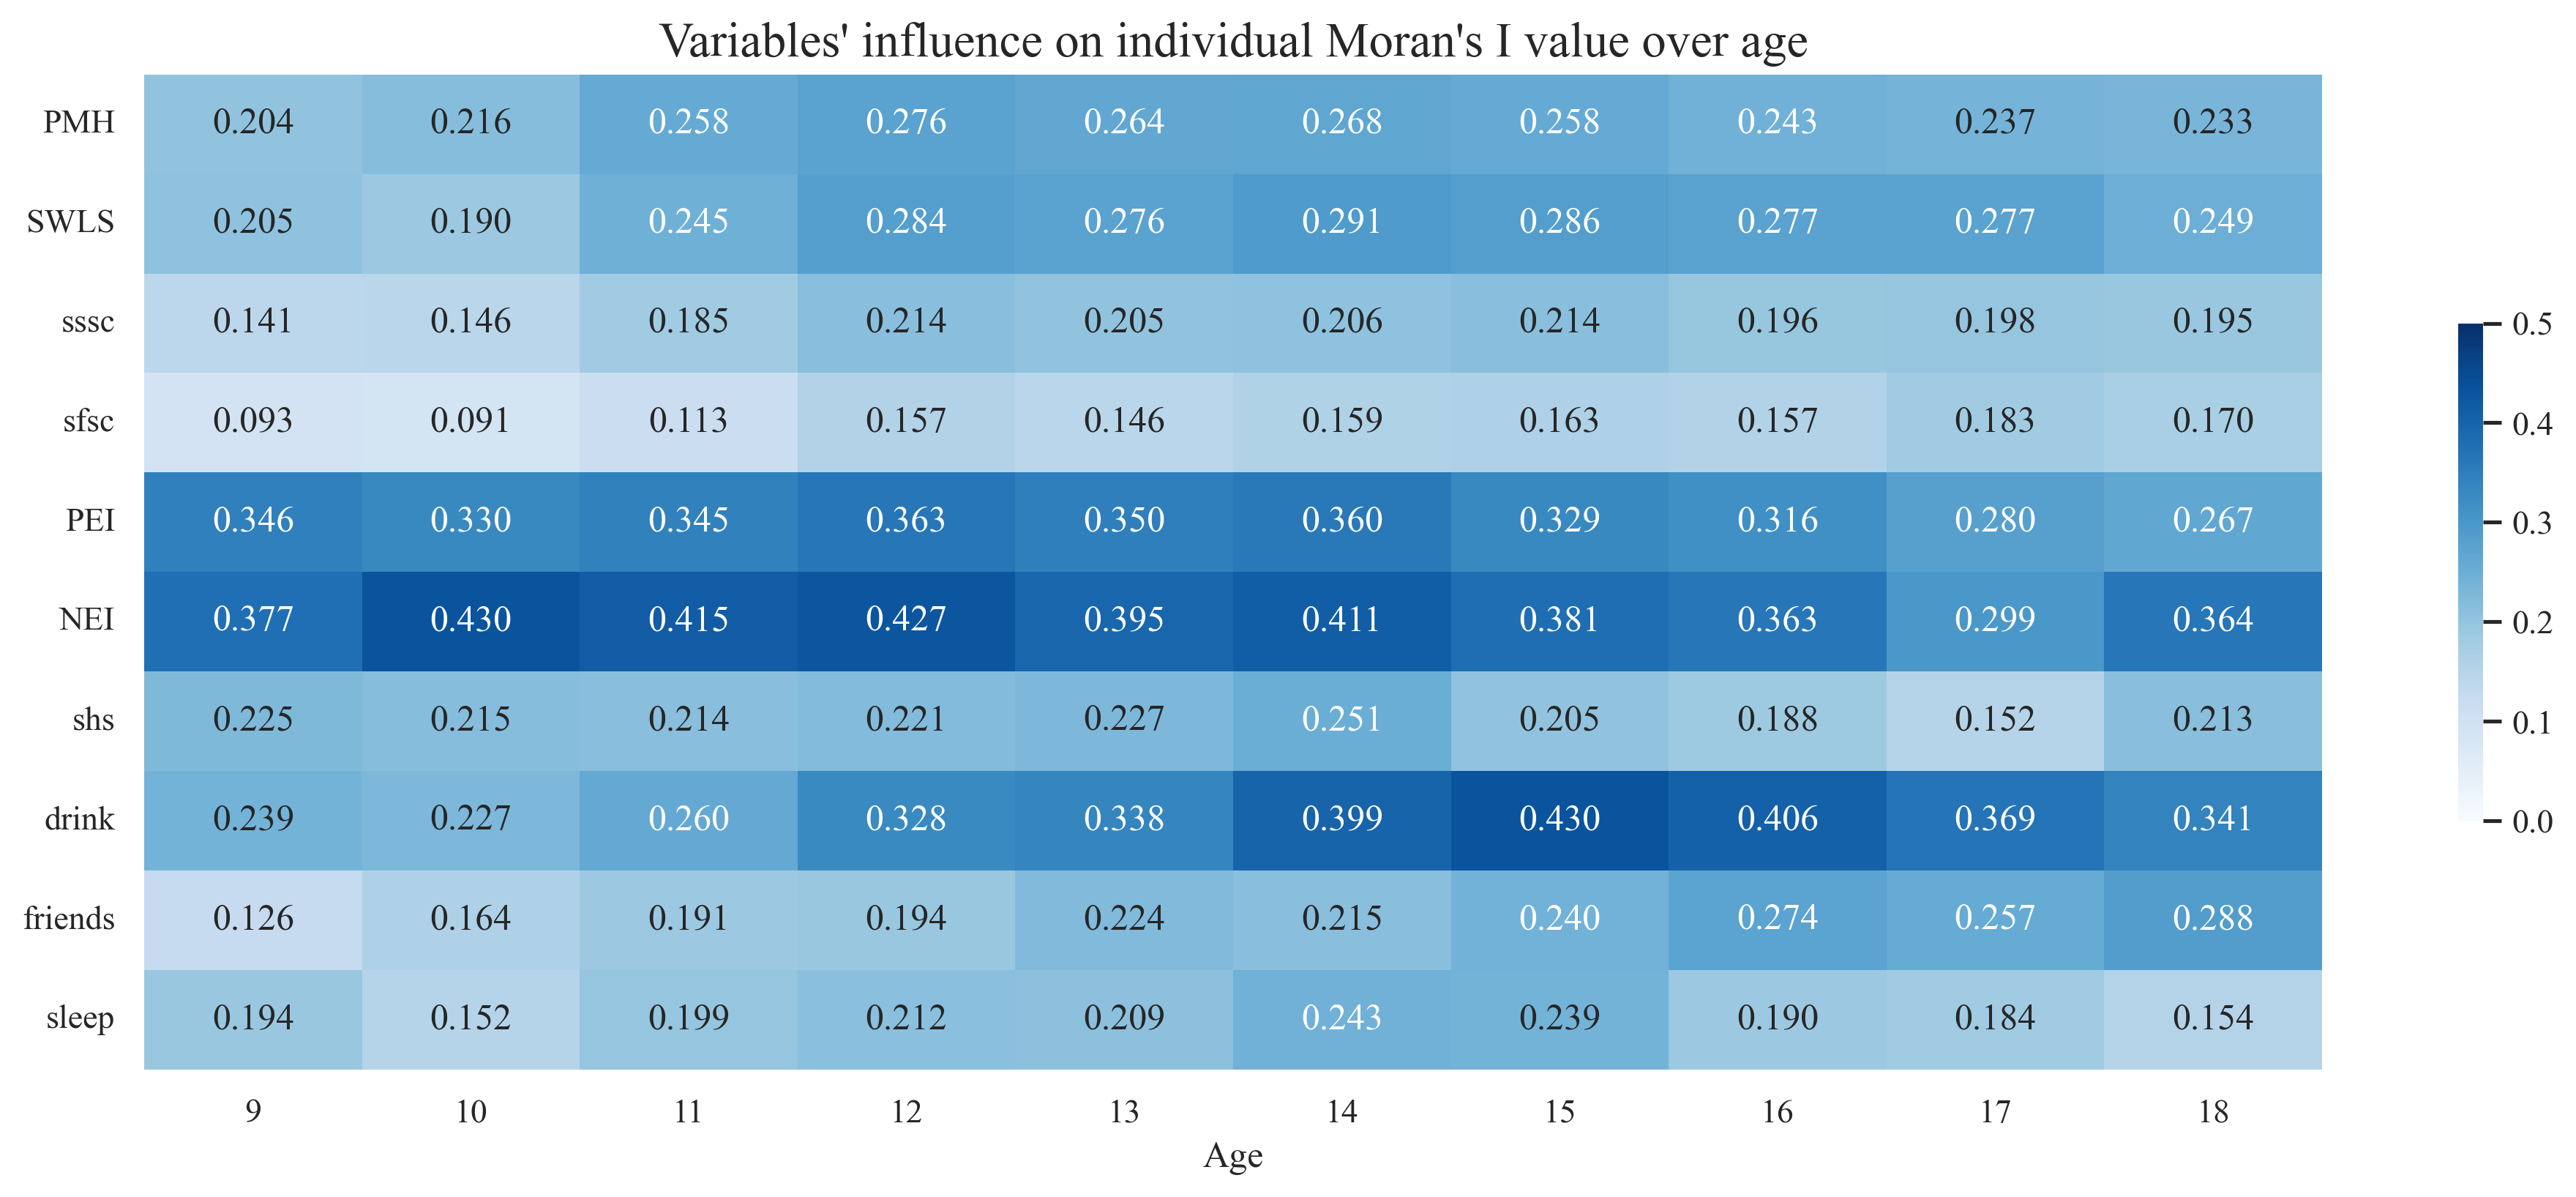

In [6]:
tmp1 = high_var.copy()
tmp2 = low_var.copy()
plt.figure(figsize=(16, 6))
fig = sns.heatmap((tmp1.abs() + tmp2.abs()).astype(float).T, cmap='Blues', annot=True, vmin=0, vmax=0.5, cbar_kws={"shrink": 0.5}, fmt='.3f')
fig.set_title('Variables\' influence on individual Moran\'s I value over age', size=16)
fig.set_yticklabels(fig.get_yticklabels(), rotation=0)
fig.set_xlabel('Age')